<h1>ДЗ по эконометрике!</h1>
<h2>Скворцов Иван, Анна Пономаренко, БЭК-181</h2>

In [1]:
!git clone "https://github.com/Anna-Pon/IADHW/"

Cloning into 'IADHW'...
remote: Enumerating objects: 111051, done.
remote: Counting objects: 100% (667/667), done.
remote: Compressing objects: 100% (358/358), done.
remote: Total 111051 (delta 313), reused 658 (delta 306), pack-reused 110384
Receiving objects: 100% (111051/111051), 236.81 MiB | 28.33 MiB/s, done.
Resolving deltas: 100% (1351/1351), done.
Checking out files: 100% (110632/110632), done.


In [10]:
!pip uninstall matplotlib < <(yes) # по какой-то причине матплотлиб в колабе тупит, так что приходится переустанавливать :(
!pip install matplotlib==3.1.3

Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)?   Successfully uninstalled matplotlib-3.4.2
  Using cached https://files.pythonhosted.org/packages/4c/9b/35ab3469fd1509f7636a344940569ebfd33239673fd2318e80b4700a257c/matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install sktime[all_extras]

     |████████████████████████████████| 5.7MB 15.8MB/s 
     |████████████████████████████████| 22.3MB 27.8MB/s 
     |████████████████████████████████| 9.5MB 31.5MB/s 
     |████████████████████████████████| 10.3MB 28.1MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 788kB 30.3MB/s 
     |████████████████████████████████| 1.5MB 34.5MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 716kB 36.0MB/s 
     |████████████████████████████████| 1.1MB 27.7MB/s 
     |████████████████████████████████| 194kB 37.9MB/s 
     |████████████████████████████████| 122kB 38.7MB/s 
     |████████████████████████████████| 1.3MB 27.9MB/s 
     |████████████████████████████████

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Временной ряд с месячной частотой

## Взять языка



Временной ряд взят [отсюда](https://www.kaggle.com/piyushagni5/monthly-sales-of-french-champagne).

In [5]:
# считаем файлы
ts = pd.read_csv('/content/IADHW/monthly_champagne_sales.csv')

In [6]:
ts['Month'] = pd.to_datetime(ts['Month'], format = '%Y-%m')

In [7]:
ts.set_index('Month', inplace = True)

In [8]:
ts.index = ts.index.to_period("M") # говорим что индекс у нас с месячной частотой

## Намалевич

Сначала сам ряд. Просто и лаконично. И легко дышится.

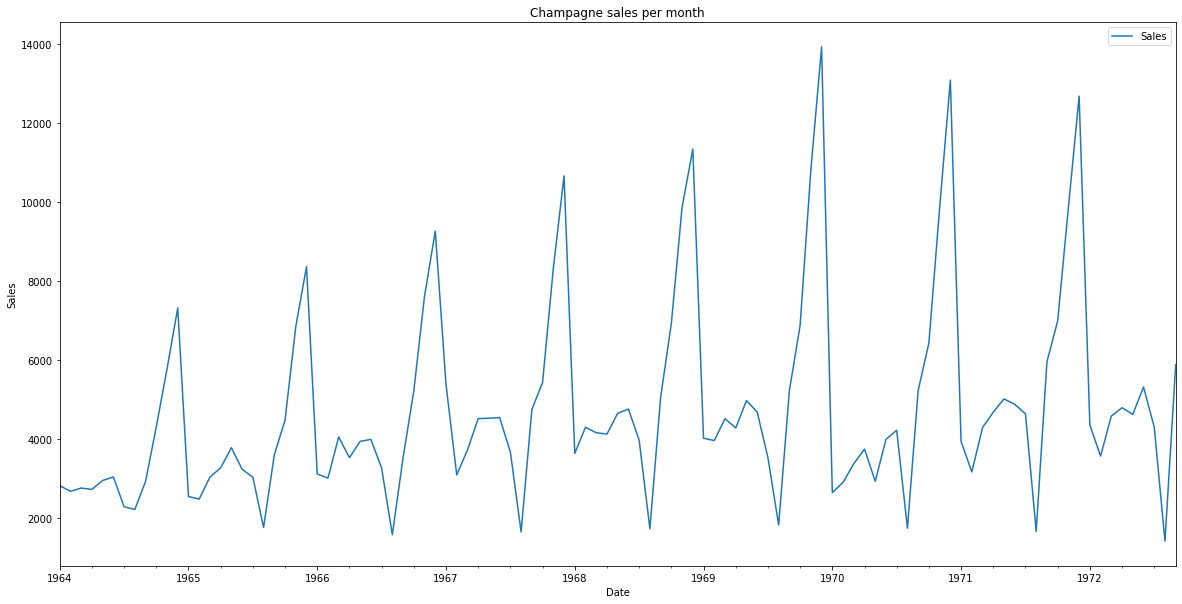

In [12]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts.plot(ax = ax)
ax.set(title = 'Champagne sales per month', xlabel = 'Date', ylabel = 'Sales')

plt.show()

Теперь автокорреляцию. Схватим очевидную сезонность.

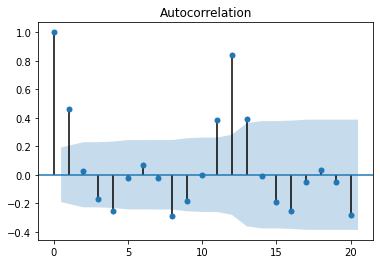

In [13]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(ts["Sales"], lags=20)
plt.show()

Ну и наконец построим ряд с наложением.

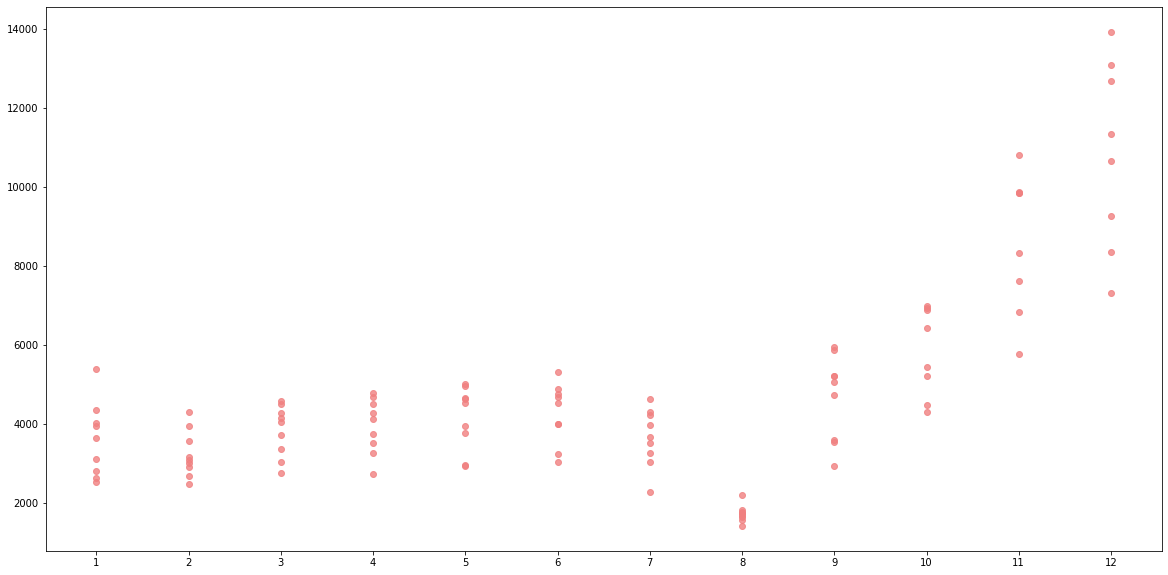

In [14]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ax.plot(ts.index.month, ts.Sales, 'o', color = 'lightcoral', alpha = .8)
ax.set_xticks([i for i in range(1, 13)])

plt.show()

## Твиттер

Выбранный ряд явно сезонный: это видно на всех графиках, которые мы привели ☺️. Тренд если и наблюдается, то довольно незначительный; при этом ряд не стационарен: разброс его значений непостоянен. Логарифм брать не будем, поскольку это ничего особо не меняет. 

## Двенадцать месяцев

Трейнтестим!

In [15]:
ts_train = ts.iloc[0:int(0.89 * ts.shape[0]), :]
ts_test = ts.iloc[int(0.89 * ts.shape[0]):, :]

print(f'Месяцев в тестовой выборке: {ts_test.shape[0]}')

Месяцев в тестовой выборке: 12


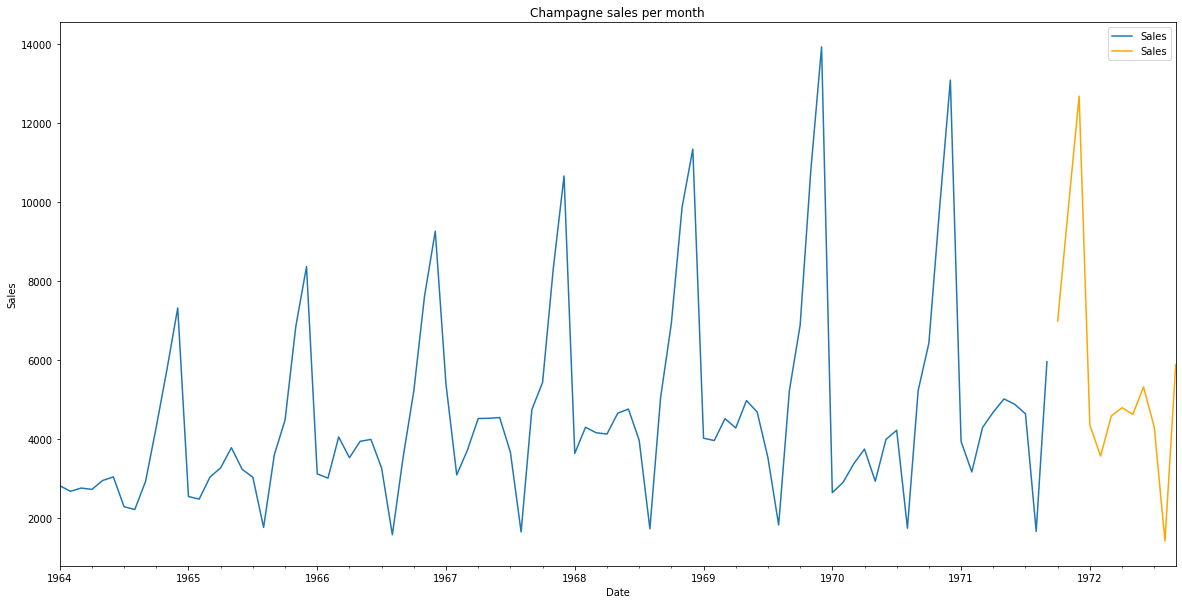

In [16]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts_train.plot(ax = ax)
ts_test.plot(ax = ax, color = 'orange')
ax.set(title = 'Champagne sales per month', xlabel = 'Date', ylabel = 'Sales')

plt.show()

In [17]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS
from sktime.performance_metrics.forecasting import MeanAbsoluteError

mae = MeanAbsoluteError() # y_true, y_pred

### Наивная

In [18]:
nfc = NaiveForecaster(strategy='last')
nfc.fit(ts_train['Sales'])

NaiveForecaster()

In [19]:
fh = ForecastingHorizon(ts_test.index, is_relative=False)

In [20]:
def plot_fc(y_train, y_test, fc):

  err = np.round(mae(y_test, fc), 2)

  fig, ax = plt.subplots(1, figsize = (20, 10))

  y_train.plot(ax = ax, color = 'cornflowerblue', label = 'Train', linewidth = 1.7)
  y_test.plot(ax = ax, color = 'sandybrown', label = 'Test', linewidth = 1.7)
  fc.plot(ax = ax, color = 'mediumseagreen', linestyle = 'dashed', label = 'Forecast', linewidth = 1.7)

  ax.set(title = '', xlabel = 'Date', ylabel = 'Value')
  ax.text(0.013, 0.95, f'MAE: {err}', fontsize = 24, horizontalalignment='left', verticalalignment='center', transform = ax.transAxes)

  plt.legend()
  plt.show()

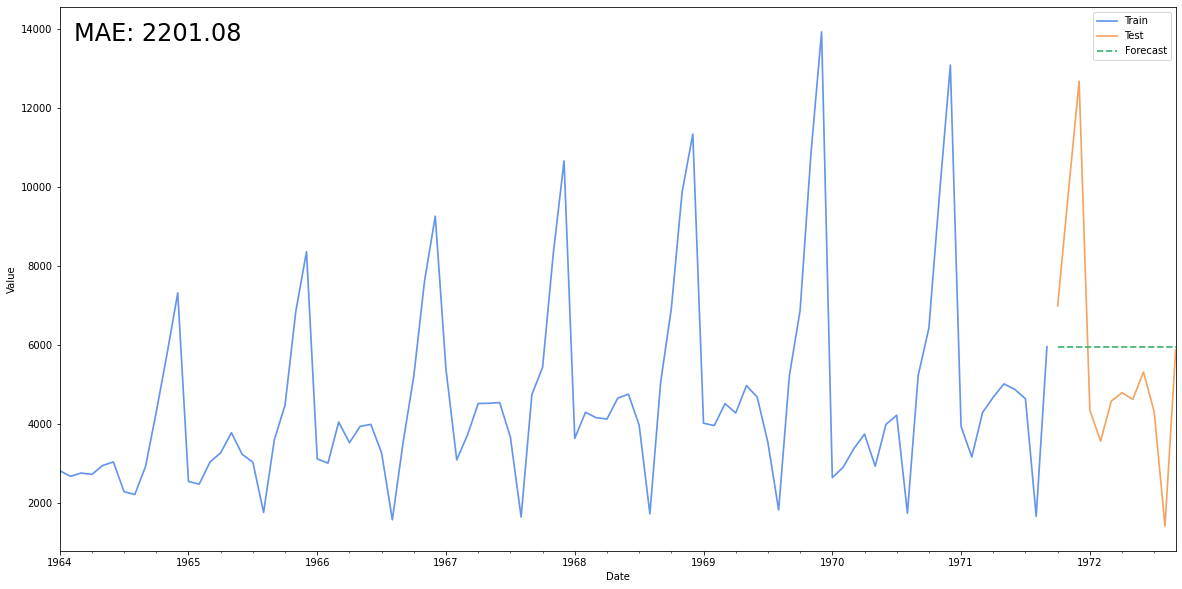

In [21]:
plot_fc(ts_train['Sales'], ts_test['Sales'], nfc.predict(fh))

### Сезонная наивная

In [22]:
nfc = NaiveForecaster(strategy='last', sp = 12)
nfc.fit(ts_train['Sales'])
fh = ForecastingHorizon(ts_test.index, is_relative=False)

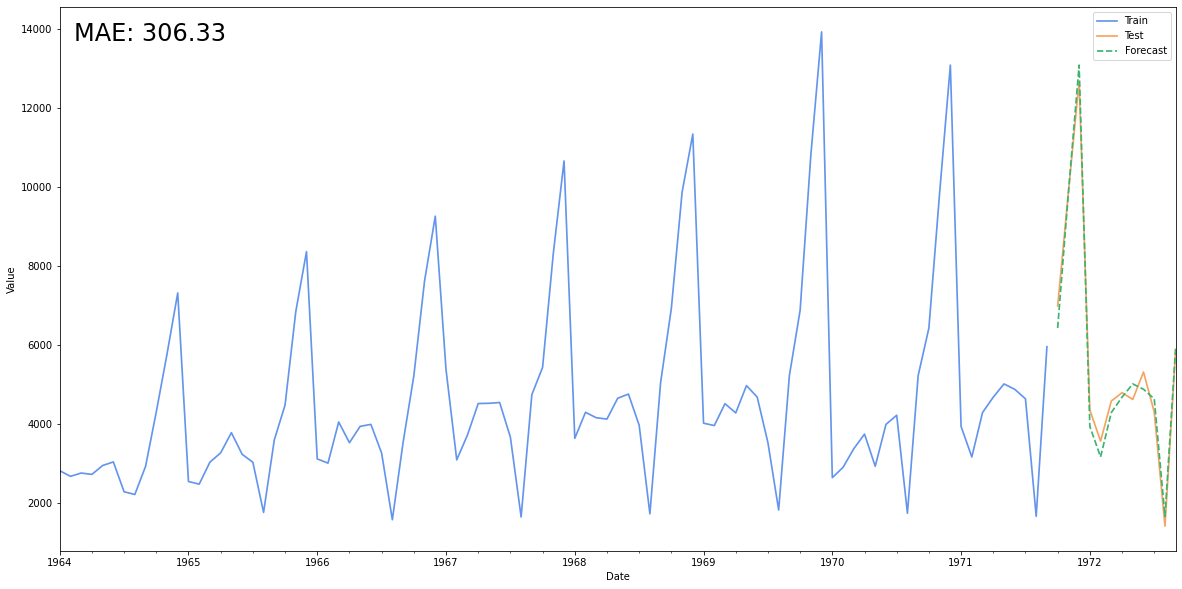

In [23]:
plot_fc(ts_train['Sales'], ts_test['Sales'], nfc.predict(fh))

### SARIMA(1, 1, 1)(1, 0, 0)[12]

In [24]:
arima = ARIMA(order = (1, 1, 1), seasonal_order = (1, 0, 0, 12), suppress_warnings = True)
arima.fit(ts_train['Sales'])
fh = ForecastingHorizon(ts_test.index, is_relative=False)

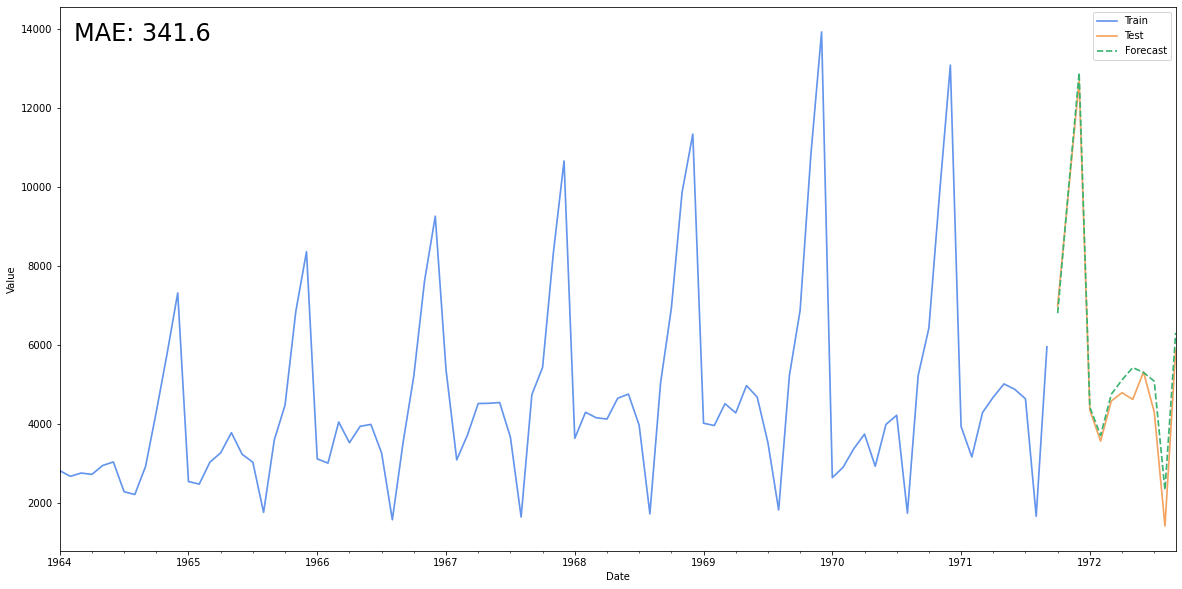

In [25]:
plot_fc(ts_train['Sales'], ts_test['Sales'], arima.predict(fh))

### Auto-ARIMA

In [26]:
arima = AutoARIMA(sp = 12, suppress_warnings = True, information_criterion = 'aic', scoring = 'mae')
arima.fit(ts_train['Sales'])
fh = ForecastingHorizon(ts_test.index, is_relative=False)

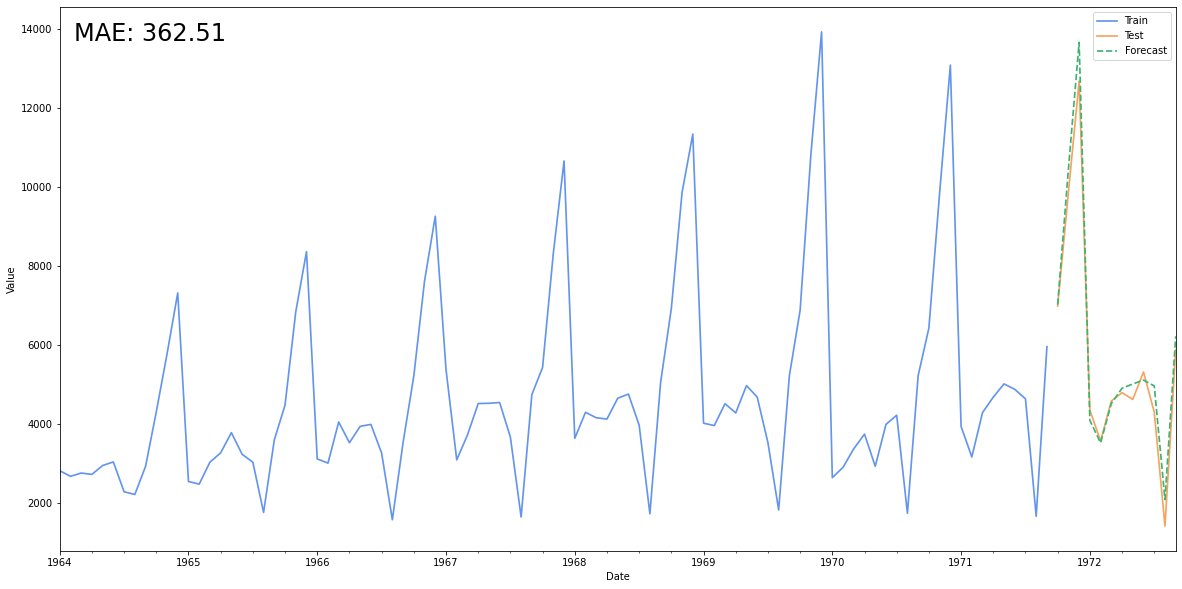

In [27]:
plot_fc(ts_train['Sales'], ts_test['Sales'], arima.predict(fh))

### ETS(AAA)

In [28]:
ets = ExponentialSmoothing(trend = 'add', seasonal = 'add', sp = 12)
ets.fit(ts_train['Sales'])
fh = ForecastingHorizon(ts_test.index, is_relative=False)

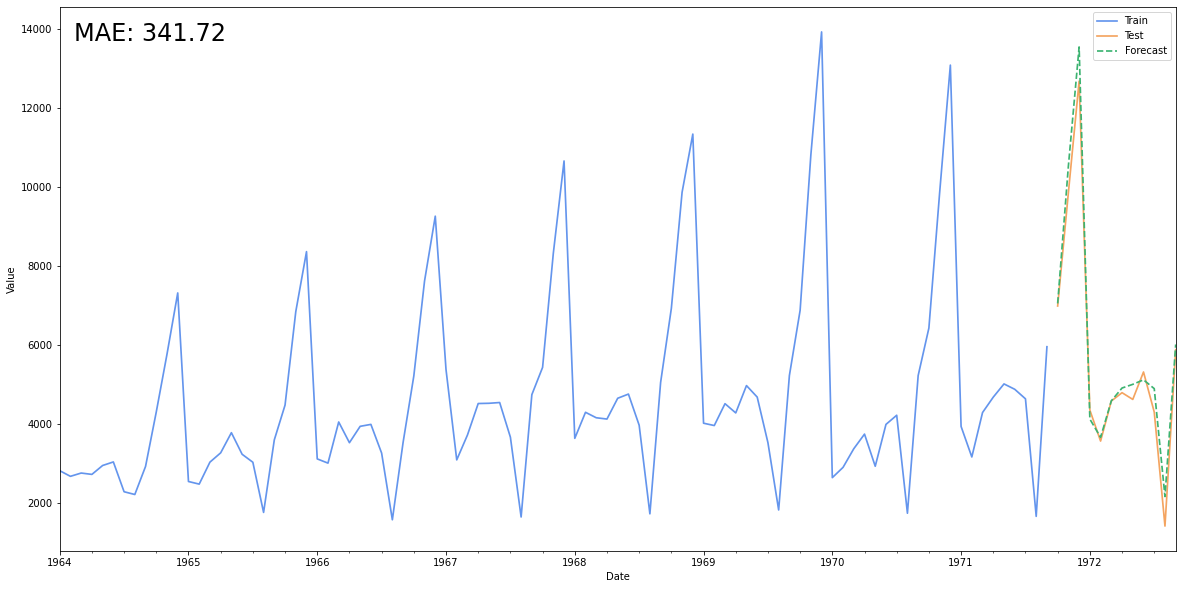

In [29]:
plot_fc(ts_train['Sales'], ts_test['Sales'], ets.predict(fh))

### AutoETS

In [30]:
ets = AutoETS(auto = True, sp = 12)
ets.fit(ts_train['Sales'].astype(np.float64))
fh = ForecastingHorizon(ts_test.index, is_relative=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/exponential_smoothing/ets.py:1135: RuntimeWarning: invalid value encountered in log
  logL -= np.sum(np.log(yhat))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


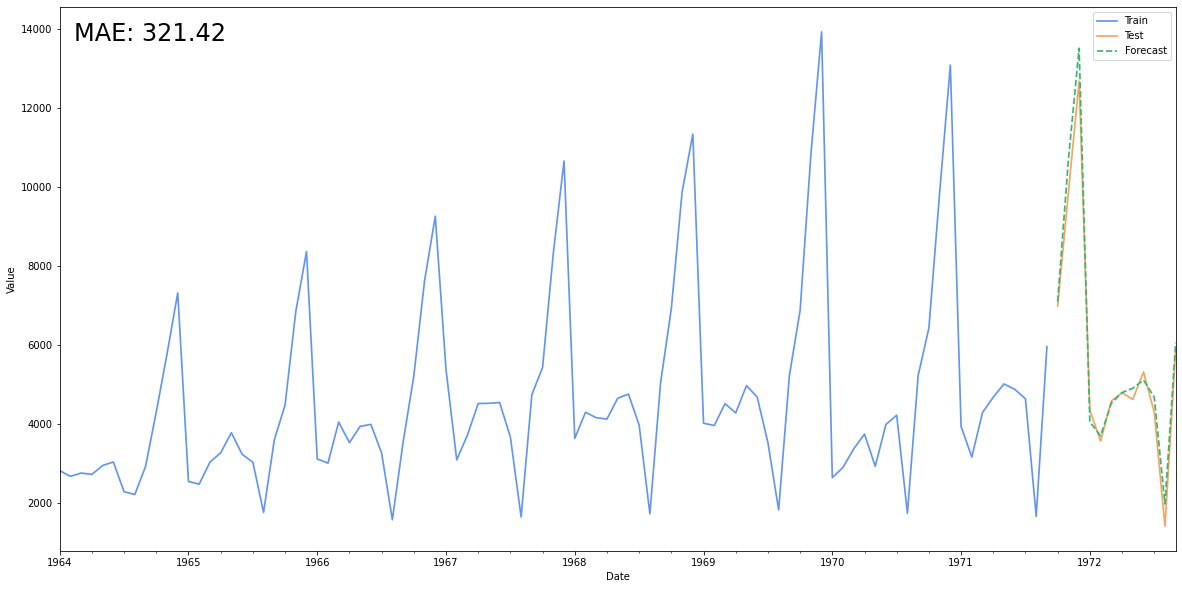

In [31]:
plot_fc(ts_train['Sales'], ts_test['Sales'], ets.predict(fh))

## Кто на свете всех милее?

Лучшей моделью оказалась сезонная наивная. Но это не интересно, поэтому давайте не будем ее рассматривать (в конце концов, из-за нестационарности ряда она перестанет давать хорошие результаты при увеличении длительности тестововой выборки).

Таким образом, по-настоящему лучшая модель &mdash; AutoETS (с автоматическим выбором на основании критерия Акаике). Построим прогноз на год вперед, используя всю выборку в качестве обучающей.

In [32]:
ets = AutoETS(trend = 'add', seasonal = 'add', sp = 12)
ets.fit(ts['Sales'].astype(np.float64))
fh = ForecastingHorizon([i for i in range(1, 13)], is_relative=True)

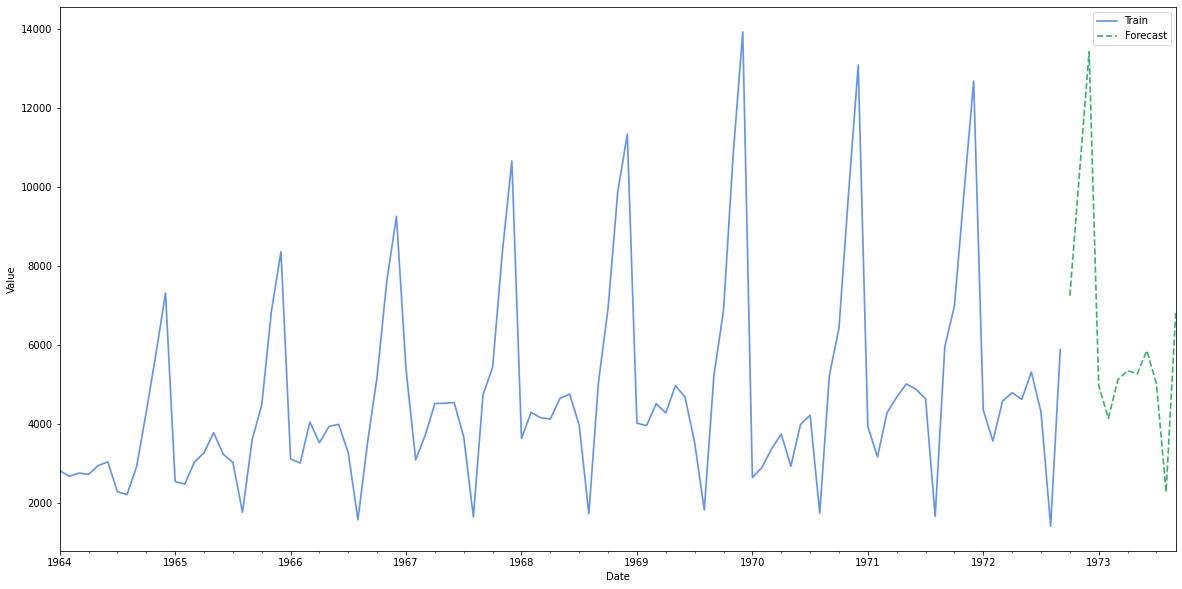

In [33]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ts['Sales'].plot(ax = ax, color = 'cornflowerblue', label = 'Train', linewidth = 1.7)
ets.predict(fh).plot(ax = ax, color = 'mediumseagreen', linestyle = 'dashed', label = 'Forecast', linewidth = 1.7)
ax.set(title = '', xlabel = 'Date', ylabel = 'Value')

plt.legend()
plt.show()

Йуху!

# Панельные данные

## Хождение в народ

В качестве вопроса для данного раздела мы выбрали следующий: "как число детей в семье влияет на потребление алкоголя?"

**В выборку вошли следующие показатели:**
- NCAT1 &mdash; дети до 7
- NCAT2 &mdash; дети >7 лет
- ALCOHLN - номинальные затраты на алкоголь
- ALCOHLR - реальные затраты на алкоголь

Колонки `ID_W` и `ID_H` отвечают за год исследования и индивидуальный номер домохозяйства, соответственно.



In [34]:
pnl = pd.read_csv("/content/IADHW/alcodta.txt", engine="python", encoding="cp1251")

In [35]:
pnl.head()

,ID_W,REDID_H,ID_H,NCAT1,NCAT2,ALCOHLN,ALCOHLR
0,1994 год,1,1001,Нет,Нет,40285.71,609.750000
1,1994 год,2,1002,Нет,2 человека,17142.86,259.470001
2,1994 год,3,1003,Нет,Нет,0.00,0.000000
3,1994 год,4,1004,Нет,Нет,0.00,0.000000
4,1994 год,5,1005,Нет,Нет,271285.71,4106.080078


Имеем дело с несбалансированной панелью: состав выборки по домохозяйствам меняется из года в год.

In [36]:
pnl.groupby(['ID_W']).agg({'ID_H' : 'nunique'}).head()

,ID_H
ID_W,
1994 год,3767
1995 год,3607
1996 год,3562
1998 год,3621
2000 год,3777


Оставим только те домохозяйства, которые участвовали в исследовании более четырех раз:

In [37]:
vc = pnl.ID_H.value_counts()
vc = vc[vc > 4]
hh = vc.index.tolist()

pnl = pnl[pnl.ID_H.isin(hh)]

Также исключим наблюдения, у которых затраты на алкоголь равны нулю &mdash; очевидно, в таких случаях респонденты врали :)))

In [38]:
pnl = pnl[pnl.ALCOHLR != 0]

In [39]:
print(f'Итоговое число наблюдений: {pnl.shape[0]}')

Итоговое число наблюдений: 24419


Украсим наш датасет, поработав с типами данных и названием столбцов:

In [40]:
def parser_1(x):
  if x == 'Нет':
    return 0
  else:
    return int(x.split(' ')[0])

pnl['NCAT1'] = pnl.NCAT1.apply(parser_1)
pnl['NCAT2'] = pnl.NCAT2.apply(parser_1)

In [41]:
pnl['ID_W'] = pnl.ID_W.str.split(' ').str[0]
pnl['ID_W'] = pnl['ID_W'].astype(int)

In [42]:
pnl.dropna(inplace=True)
pnl.drop(columns = ['REDID_H'], inplace = True)

In [43]:
pnl.rename(columns = {
    'ID_W' : 'year',
    'ID_H' : 'hh_id',
    'NCAT1' : 'kids_7',
    'NCAT2' : 'kids_18',
    'ALCOHLN' : 'alco_nom',
    'ALCOHLR' : 'alco_real',
}, inplace = True)

Зададим переменную количества членов семьи в возрасте до 18 лет (`kids`).

In [44]:
pnl['kids'] = pnl.kids_7 + pnl.kids_18

Для моделей будем использовать логарифм реальных затрат на алкоголь.

In [45]:
pnl['alco_ln'] = np.log1p(pnl['alco_real'])

## Сделай красиво!

Сначала построим pooled scatter plot для нашего исследовательского вопроса.

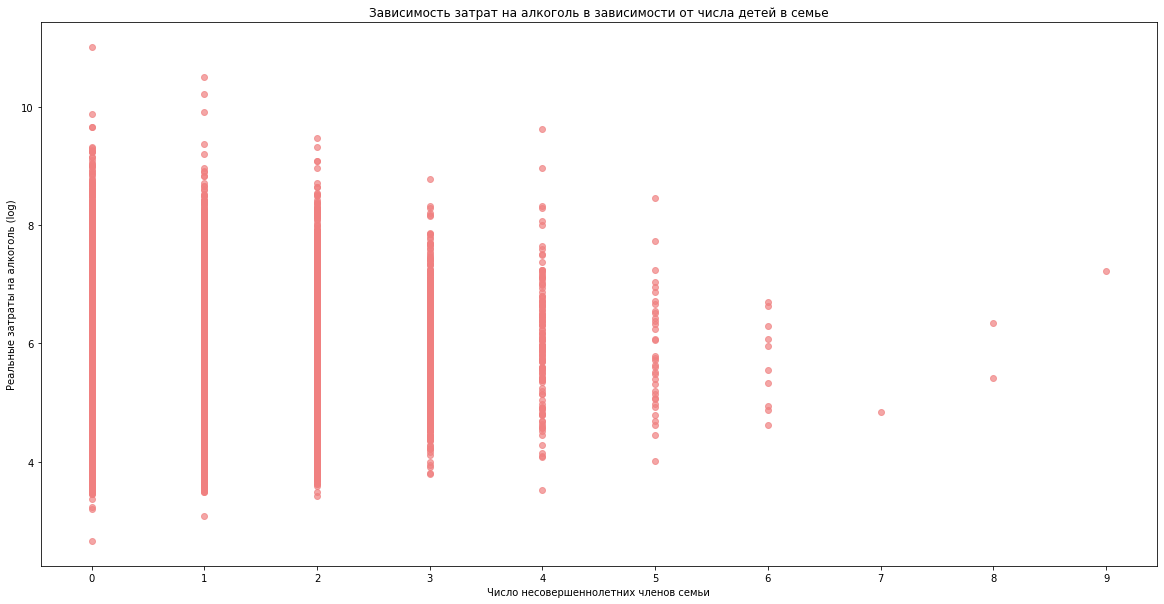

In [46]:
fig, ax = plt.subplots(1, figsize = (20, 10))

ax.plot(pnl.kids, pnl.alco_ln, 'o', color = 'lightcoral', alpha = .7)
ax.set(title = 'Зависимость затрат на алкоголь в зависимости от числа детей в семье', xlabel = 'Число несовершеннолетних членов семьи', ylabel = 'Реальные затраты на алкоголь (log)')
ax.set_xticks(list(range(0, pnl.kids.max() + 1)))
plt.show() # очень красиво.

Теперь посмотрим на эту же зависимость по годам:

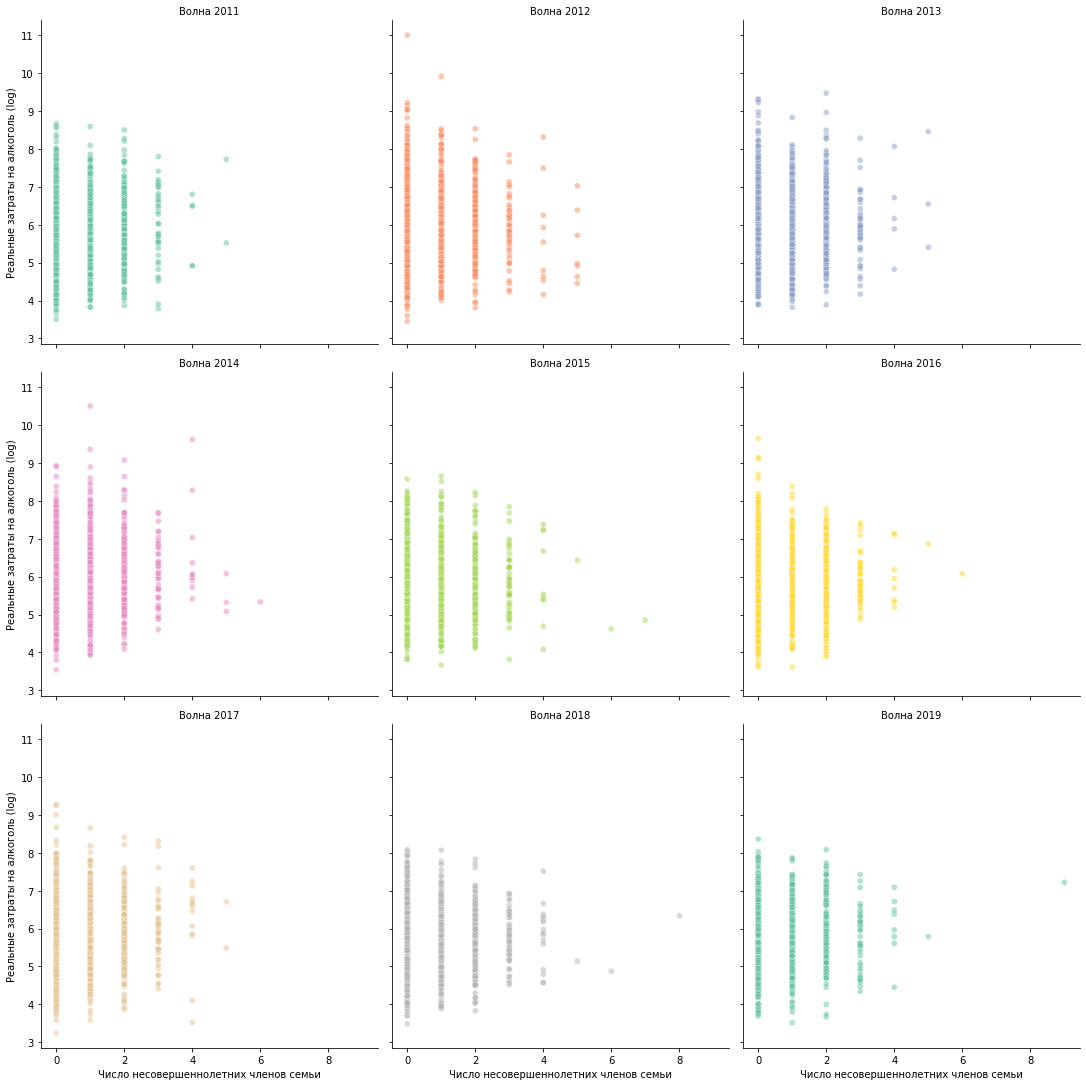

In [47]:
pnl_plot = pnl.reset_index().query("year > 2010")
pnl_plot['year'] = pnl_plot['year'].astype('str')

ax = sns.relplot(
    data = pnl_plot, 
    x = "kids", 
    y = "alco_ln", 
    hue = "year", 
    col = "year",
    col_wrap=3,
    alpha = .5,
    legend = False,
    palette = sns.color_palette('Set2', 9)
    )

ax.set_titles(col_template = "Волна {col_name}")
ax.set_axis_labels(x_var = 'Число несовершеннолетних членов семьи', y_var = 'Реальные затраты на алкоголь (log)')

plt.show()

Как видим, особой зависимости между выбранными переменными нет. Как минимум, она явно не моделируется линейными моделями. Потенциально можно было бы включить в модель контрольные переменные, но это ведь потенциально 😁

## Три сестры

Прогоним на данных три модели: Pooled, Fixed effects и Random effects. Будем использовать устойчивую к гетероскедастичности оценку ковариационной матрицы ошибок!

In [48]:
pnl = pnl.set_index(['hh_id', 'year'])

In [49]:
!pip install linearmodels
from linearmodels.panel.model import PooledOLS, RandomEffects, PanelOLS
import statsmodels.api as sm

     |████████████████████████████████| 1.5MB 20.4MB/s 


### Сквозная модель

In [50]:
exog_vars = ['kids']
exog = sm.add_constant(pnl[exog_vars])
mod = PooledOLS(pnl.alco_ln, exog)
pooled_res = mod.fit(cov_type = 'robust')
print(pooled_res) # все довольно грустно

                          PooledOLS Estimation Summary                          
Dep. Variable:                alco_ln   R-squared:                     7.141e-05
Estimator:                  PooledOLS   R-squared (Between):             -0.0066
No. Observations:               24419   R-squared (Within):               0.0001
Date:                Wed, Jun 16 2021   R-squared (Overall):           7.141e-05
Time:                        15:13:21   Log-likelihood                -3.119e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.7437
Entities:                        7357   P-value                           0.1867
Avg Obs:                       3.3192   Distribution:                 F(1,24417)
Min Obs:                       1.0000                                           
Max Obs:                       15.000   F-statistic (robust):             1.7114
                            

### FE-модель

In [51]:
exog_vars = ['kids']
exog = sm.add_constant(pnl[exog_vars])
mod = PanelOLS(pnl.alco_ln, exog)
fe_res = mod.fit(cov_type = 'robust')
print(fe_res) # тут тоже все довольно грустно

                          PanelOLS Estimation Summary                           
Dep. Variable:                alco_ln   R-squared:                     7.141e-05
Estimator:                   PanelOLS   R-squared (Between):             -0.0066
No. Observations:               24419   R-squared (Within):               0.0001
Date:                Wed, Jun 16 2021   R-squared (Overall):           7.141e-05
Time:                        15:13:23   Log-likelihood                -3.119e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.7437
Entities:                        7357   P-value                           0.1867
Avg Obs:                       3.3192   Distribution:                 F(1,24417)
Min Obs:                       1.0000                                           
Max Obs:                       15.000   F-statistic (robust):             1.7114
                            

### RE-модель

In [52]:
exog_vars = ['kids']
exog = sm.add_constant(pnl[exog_vars])
mod = RandomEffects(pnl.alco_ln, exog)
re_res = mod.fit(cov_type = 'robust')
print(re_res) # а тут уже получше, конечно

                        RandomEffects Estimation Summary                        
Dep. Variable:                alco_ln   R-squared:                        0.3504
Estimator:              RandomEffects   R-squared (Between):             -0.0012
No. Observations:               24419   R-squared (Within):               0.0002
Date:                Wed, Jun 16 2021   R-squared (Overall):             -0.0012
Time:                        15:13:28   Log-likelihood                -2.774e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                   1.317e+04
Entities:                        7357   P-value                           0.0000
Avg Obs:                       3.3192   Distribution:                 F(1,24417)
Min Obs:                       1.0000                                           
Max Obs:                       15.000   F-statistic (robust):             2.9447
                            

### Сравнение моделей

Для начала просто выведем сравнительную табличку.

In [53]:
from linearmodels.panel import compare
print(compare({
    'Pooled':pooled_res,
    'FE':fe_res,
    'RE':re_res
    })
)

                       Model Comparison                      
                           Pooled          FE              RE
-------------------------------------------------------------
Dep. Variable             alco_ln     alco_ln         alco_ln
Estimator               PooledOLS    PanelOLS   RandomEffects
No. Observations            24419       24419           24419
Cov. Est.                  Robust      Robust          Robust
R-squared               7.141e-05   7.141e-05          0.3504
R-Squared (Within)         0.0001      0.0001          0.0002
R-Squared (Between)       -0.0066     -0.0066         -0.0012
R-Squared (Overall)     7.141e-05   7.141e-05         -0.0012
F-statistic                1.7437      1.7437       1.317e+04
P-value (F-stat)           0.1867      0.1867          0.0000
===================== =========== =========== ===============
const                      5.7982      5.7982          5.7639
                         (807.11)    (807.11)        (635.45)
kids    

Нам повезло: результаты Pooled и FE моделей не отличаются (видимо, не зависящая от времени ошибка для i-го домохозяйства $v_i$ равна нулю), а их адекватность сомнительна: как минимум, F-тест против константной модели не отвергает нулевую гипотезу при 10% уровне значимости.

RE-модель показала себя значительно лучше. Для успокоения души проведем тест Хаусмана (RE vs. FE).


In [54]:
from scipy import stats

# null hypothesis: random effects model
psi = fe_res.cov.iloc[1:,1:] - re_res.cov.iloc[1:,1:]
diff = fe_res.params[1:] - re_res.params[1:]
W = diff.dot(np.linalg.inv(psi)).dot(diff)
dof = re_res.params.size - 1
pvalue = stats.chi2(dof).sf(W)
print("Hausman Test: chisq = {0}, df = {1}, p-value = {2}".format(W, dof, pvalue))

Hausman Test: chisq = -1.336336343919364, df = 1, p-value = 1.0


Interesting. $\chi^2$-статистика оказалась отрицательной! Если верить умным людям [тут](https://www.researchgate.net/post/How_can_the_Hausman_test_be_negative_and_why), это нормально, поскольку статистика распределена как хи-квадрат только при H0. Так что спокойненько отвергаем нулевую гипотезу и *делаем выбор в пользу RE-модели.*